In [1]:
import sys
import os
import importlib
sys.path.append(os.path.abspath(os.path.join('../scripts/')))

In [2]:
import tools

In [3]:
import makedfs

In [4]:
importlib.reload(tools);
importlib.reload(makedfs);

In [5]:
tools = tools.Util()
prepdf = makedfs.Pypoint()

# import data
pipeline_path = "../pipe.json"
metadata_path = "../data/metadata.json"
save_path = "../data"

#### Select region to analyze and provide cooridinates below

transform the 3857 format to lat/long format using the link to converter below

https://epsg.io/transform#s_srs=3857&t_srs=4326
    
to select region, you can visualize the map here

https://epsg.io/map#srs=4326&x=-93.864003&y=41.951945&z=11&layer=satellite

In [6]:
# Coordinate of small portion of City of ROcks data
coordinates = [[-113.6973, 42.0732], [-113.7001, 42.0712],
               [-113.6996, 42.0701], [-113.6982, 42.0715]]

In [7]:
# Generate the polygon with the above defined points

polygon2 = tools.generate_polygon(coordinates, 4326)
# Looking at the region selected by the polygon

tools.show_on_map(polygon2, 15)

In [8]:
# Loading the points

data_df = prepdf.fetch_data(coordinates, metadata_path, save_path+"/original.csv", pipeline_path)

Selected Regions: ['ID_CityofRocks_2011/']
Number of loaded points: 121689


In [9]:
# Creating the geo dataframe out of the loaded point clouds.

geo_df = data_df.loc[0,"data"]

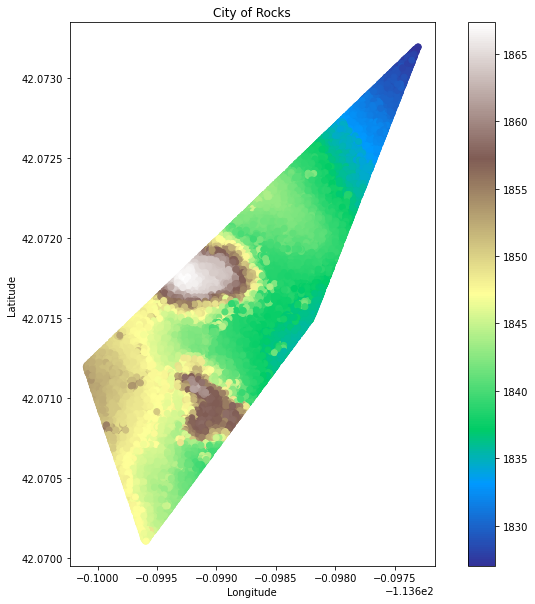

In [10]:
# Heat map of the loaded maps

prepdf.plot_heatmap(geo_df, "City of Rocks", save_path+"/image1.png")

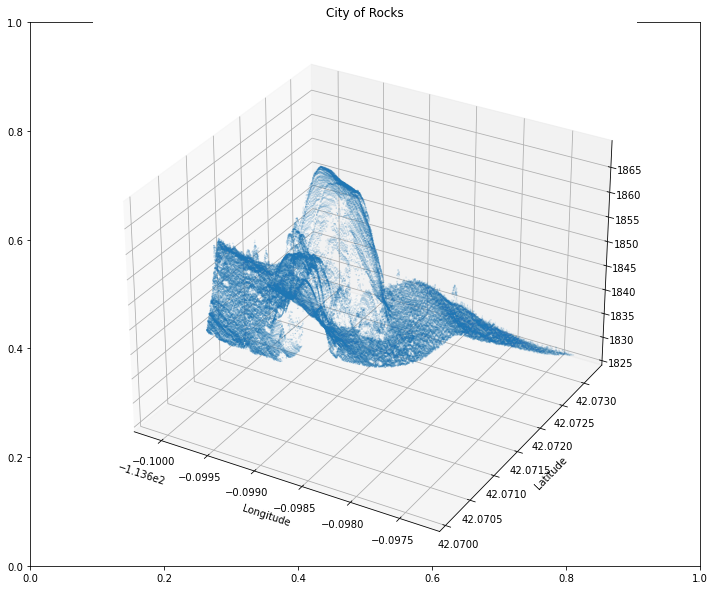

In [11]:
# 3d render of the loaded points

prepdf.render_3d(geo_df, "City of Rocks", save_path+"/image1_3d.png")

### Resampling

In [ ]:
# resampling and creating new dataframes using grid sampling
gr_df = prepdf.grid_resample(geo_df, 0.001)

In [ ]:
# ploting the new points

prepdf.plot_heatmap(gr_df, "City of Rocks", save_path+"/image2.png")

In [ ]:
prepdf.render_3d(gr_df, "City of Rocks", save_path+"/image2_3d.png")

### Calculating TWI

In [ ]:
# calculating Topographic Wetness Index.

full_df = prepdf.calculate_TWI(geo_df, 0.0001, save_slope=save_path+"/slope1.png", save_accum=save_path+"/accum1.png")

In [ ]:
# checking whether the calculated TWI result is present 

full_df.head(10)